<a href="https://colab.research.google.com/github/uosioo/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [3]:
pwd


'/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

In [47]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical  

import os
import datetime

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

#nasz spis labeli testowych pokazuje nam id znaku dla danej pozycji
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [6]:
#@title Default title text
#są 43 unikalne znaki w naszej bazie (0-42)
len(np.unique(y_train))

#id znaków zaczynają się od 0
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [7]:
#będziemy potrzebować nie od znaku, a macierzy w postaci 0/1
#macierz będzie miała 43 kolumny (bo tyle jest znaków ogółem)
#dla id znaku 41 cały wiersz będzie wypełniony 0 poza kolumną #41, w której będzie 1, jako wskazanie id znaku

#y_train[0] to znak id o id 41 - zrzutowane na tą macierz o której wyżej pokazuje 1 na pozycji przedostatniej, czyli id 41
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
#sprawdzenie ilości wymiarów tablicy
y_train.ndim

#jeśli tablica jest jednowymiarowa, to rzutujemy ją na stałe do zmiennej y_train

if y_train.ndim == 1 : y_train = to_categorical(y_train)

In [9]:
# teraz widać, że y_train jest dwuwymiarowe - ma 35k wierszy w 43 kolumnach
y_train.ndim
y_train.shape

(34799, 43)

In [10]:
#to samo dla testa
if y_test.ndim == 1 : y_test = to_categorical(y_test)
y_test.shape

(4410, 43)

In [11]:
#przechodzimy do tworzenia modelu danych - "SIEĆ"

#Sequential znaczy, że jest sekwencyjny "warstwowy" - warstwy przekazują wyniki po kolei do kolejych warstw

#input size to rozmiar poszczególnych pól? [1:] ogranicza nam, że bez pierwszego elementu - porównaj x_train.shape i x_train.shape[1:]
input_shape = x_train.shape[1:]

#ilość klas - czyli wielkość pierwszej kolumny z y_train
num_classes = y_train.shape[1]

#Conv2d - warstwa convalucyjna
#Flatten - w sumie ch.. wie po co
model = Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  Flatten(),
  Dense(num_classes, activation='softmax')
])

#schemat naszego modelu (sieci) - oczekuje zdjęcia 30x30 na wejściu
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile skleja naszą sieć, żeby się uczyła
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#i rozpoczynamy trening sieci
model.fit(x_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 7.5074 - accuracy: 0.7830


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax')
  ])

def train_model(model, x_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      x_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (x_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [14]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, x_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 13.5332 - accuracy: 0.7450 - val_loss: 0.2649 - val_accuracy: 0.9408
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2084 - accuracy: 0.9522 - val_loss: 0.1023 - val_accuracy: 0.9758
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1319 - accuracy: 0.9718 - val_loss: 0.1140 - val_accuracy: 0.9764
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1397 - accuracy: 0.9683 - val_loss: 0.0851 - val_accuracy: 0.9805
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1173 - accuracy: 0.9733 - val_loss: 0.0904 - val_accuracy: 0.9786


In [48]:
  #robimy prognozowanie trafności
  y_pred_prob = model_trained.predict(x_test)

  #a tak sprawdzamy co algorytm przewidział - zwraca nam macierz dopasowania dla każdego typu
  y_pred_prob[400]

array([2.2317754e-04, 4.0181026e-01, 1.5744191e-11, 9.9981915e-12,
       5.9796172e-01, 4.8521551e-06, 1.2723044e-15, 2.8984734e-19,
       1.2273722e-24, 2.6954390e-17, 3.4519273e-17, 5.6859832e-28,
       2.3155306e-21, 3.5356925e-30, 1.7227860e-28, 5.6885469e-19,
       2.0757768e-15, 0.0000000e+00, 8.4190675e-19, 2.8858645e-33,
       3.6740390e-32, 5.6608917e-23, 5.5825363e-37, 5.1869447e-23,
       1.9655686e-30, 6.4975791e-30, 1.1554478e-18, 2.8716822e-29,
       1.6995775e-24, 4.6447231e-24, 2.0005084e-38, 5.3528975e-25,
       1.1137490e-21, 2.2809767e-31, 4.6453328e-36, 3.1654424e-18,
       1.0939942e-32, 5.6010084e-22, 2.0411489e-22, 7.3143960e-32,
       2.6924574e-18, 1.8912582e-36, 2.8092498e-22], dtype=float32)

In [37]:
#tak możemy wyciągnąć indeks największej wartości z macierzy - czyli indeks najbardziej dopasowanego/rozpoznanego
np.argmax(y_pred_prob[830])

3

<BarContainer object of 43 artists>

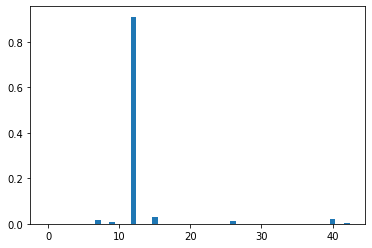

In [44]:
#możemy zrobić wykres wartości z tej macierzy - widać, czy jest jeden wiodący, czy może kilka typów
plt.bar(range(43), y_pred_prob[1])

In [0]:
#dla weryfkacji wczytujemy słownik nazw znaków
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

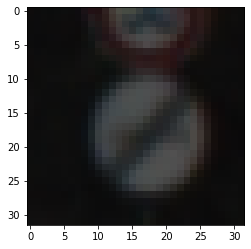

In [45]:
#dla weryfikacji podglądamy sobie obrazek
plt.imshow(x_test[1])

In [46]:
labels_dict[np.argmax(y_pred_prob[1])]

'Priority road'

In [0]:
#ubieramy to wszystko w funkcję

def predict(model_trained, x_test, y_test, scoring=accuracy_score):
  #tablica wartości prawidłowych
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(x_test)

  # zrzucamy sobie do tablicy wszystkie największe prawdopodobieństwa, czyli naszą predykcję
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)



In [51]:
#sprawdzamy jak dobrze poradził sobie nasz model
predict(model_trained, x_test, y_test)

0.8344671201814059

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.5),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
  ])

#get_cnn_v2(input_shape, num_classes).summary()

In [0]:
def train_and_predict(model, params_fit={}):
  model_trained = train_model(model, x_train, y_train, params_fit)
  return predict(model_trained, x_test, y_test)

In [59]:
params_fit = {
    'epochs':10
}
train_and_predict( get_cnn_v2(input_shape, num_classes), params_fit )

Epoch 1/10
272/272 [==============================] - 3s 9ms/step - loss: 8.2699 - accuracy: 0.0721 - val_loss: 3.4383 - val_accuracy: 0.0743
Epoch 2/10
272/272 [==============================] - 2s 9ms/step - loss: 2.9688 - accuracy: 0.2058 - val_loss: 2.4243 - val_accuracy: 0.3439
Epoch 3/10
272/272 [==============================] - 2s 9ms/step - loss: 2.0966 - accuracy: 0.3964 - val_loss: 1.5073 - val_accuracy: 0.5581
Epoch 4/10
272/272 [==============================] - 2s 9ms/step - loss: 1.5823 - accuracy: 0.5082 - val_loss: 1.0619 - val_accuracy: 0.6720
Epoch 5/10
272/272 [==============================] - 2s 9ms/step - loss: 1.1870 - accuracy: 0.6198 - val_loss: 0.6994 - val_accuracy: 0.7790
Epoch 6/10
272/272 [==============================] - 2s 9ms/step - loss: 0.8756 - accuracy: 0.7209 - val_loss: 0.4232 - val_accuracy: 0.8865
Epoch 7/10
272/272 [==============================] - 2s 9ms/step - loss: 0.7008 - accuracy: 0.7758 - val_loss: 0.2787 - val_accuracy: 0.9228
Epoch 

0.8843537414965986

In [63]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),    
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),   
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 6.3547 - accuracy: 0.2293 - val_loss: 1.9979 - val_accuracy: 0.4852
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 1.6434 - accuracy: 0.5165 - val_loss: 0.8145 - val_accuracy: 0.7822
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.9057 - accuracy: 0.7209 - val_loss: 0.3031 - val_accuracy: 0.9286
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.5391 - accuracy: 0.8349 - val_loss: 0.1339 - val_accuracy: 0.9649
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3643 - accuracy: 0.8883 - val_loss: 0.0748 - val_accuracy: 0.9848


0.9074829931972789

In [64]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),    
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),   
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 5.2816 - accuracy: 0.3592 - val_loss: 0.8281 - val_accuracy: 0.8039
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.8771 - accuracy: 0.7459 - val_loss: 0.2633 - val_accuracy: 0.9401
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4863 - accuracy: 0.8556 - val_loss: 0.1477 - val_accuracy: 0.9672
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3531 - accuracy: 0.8966 - val_loss: 0.0906 - val_accuracy: 0.9801
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2698 - accuracy: 0.9209 - val_loss: 0.0595 - val_accuracy: 0.9870


0.9108843537414966

In [67]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),    
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),   
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict( get_cnn_v5(input_shape, num_classes) )
#get_cnn_v5(input_shape, num_classes).summary()

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 3.0009 - accuracy: 0.2182 - val_loss: 1.2348 - val_accuracy: 0.6551
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.9820 - accuracy: 0.6998 - val_loss: 0.2948 - val_accuracy: 0.9206
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4597 - accuracy: 0.8568 - val_loss: 0.1675 - val_accuracy: 0.9534
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2869 - accuracy: 0.9146 - val_loss: 0.0621 - val_accuracy: 0.9841
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2018 - accuracy: 0.9392 - val_loss: 0.0465 - val_accuracy: 0.9878


0.964172335600907

In [68]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),    
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),   
    Dropout(0.3),

    Dense(1024, activation='relu'),   
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
  ])

train_and_predict( get_cnn_v6(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.7599 - accuracy: 0.2566 - val_loss: 1.3952 - val_accuracy: 0.5548
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 1.0909 - accuracy: 0.6460 - val_loss: 0.3267 - val_accuracy: 0.9078
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4618 - accuracy: 0.8535 - val_loss: 0.0815 - val_accuracy: 0.9767
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2898 - accuracy: 0.9118 - val_loss: 0.0623 - val_accuracy: 0.9811
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2186 - accuracy: 0.9363 - val_loss: 0.0454 - val_accuracy: 0.9867


0.9666666666666667

In [80]:
params_fit = {
    'epochs':25
}
train_and_predict( get_cnn_v6(input_shape, num_classes), params_fit )

Epoch 1/25
272/272 [==============================] - 4s 14ms/step - loss: 2.7729 - accuracy: 0.2522 - val_loss: 1.2075 - val_accuracy: 0.6068
Epoch 2/25
272/272 [==============================] - 4s 13ms/step - loss: 1.0088 - accuracy: 0.6770 - val_loss: 0.3207 - val_accuracy: 0.8913
Epoch 3/25
272/272 [==============================] - 4s 13ms/step - loss: 0.4798 - accuracy: 0.8486 - val_loss: 0.1052 - val_accuracy: 0.9702
Epoch 4/25
272/272 [==============================] - 4s 13ms/step - loss: 0.2963 - accuracy: 0.9083 - val_loss: 0.0653 - val_accuracy: 0.9801
Epoch 5/25
272/272 [==============================] - 4s 13ms/step - loss: 0.2110 - accuracy: 0.9360 - val_loss: 0.0375 - val_accuracy: 0.9888
Epoch 6/25
272/272 [==============================] - 4s 13ms/step - loss: 0.1778 - accuracy: 0.9478 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 7/25
272/272 [==============================] - 4s 13ms/step - loss: 0.1502 - accuracy: 0.9560 - val_loss: 0.0246 - val_accuracy: 0.9930

0.9850340136054422

In [70]:
color.rgb2gray(x_train[0]).shape

(32, 32)

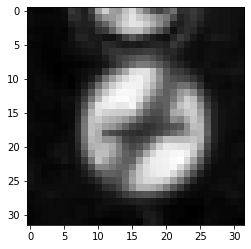

In [72]:
plt.imshow(color.rgb2gray(x_train[0]), cmap=plt.get_cmap('gray'))

In [69]:
#konwertujemy sobie kanały rgb do szarości
#teraz są 3 kanały RGB
x_train[0].shape

(32, 32, 3)

In [77]:
#to teraz prognozujemy szare zdjęcia dla porównania
x_train_gray = color.rgb2gray( x_train).reshape(-1, 32, 32, 1)
x_test_gray = color.rgb2gray( x_test ).reshape(-1, 32, 32, 1)

#jako, że obcinamy ilość kanałów, to zmienia nam się wymiar input_shape - było 32,32,3, a jest 32,32,1 - trzeba zrobić reshape
x_test_gray.reshape(-1, 32, 32, 1).shape

(4410, 32, 32, 1)

In [79]:
model = get_cnn_v6((32,32,1), num_classes)
model_trained = train_model(model, x_train_gray, y_train)
predict(model_trained, x_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5687 - accuracy: 0.2841 - val_loss: 0.6169 - val_accuracy: 0.7987
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5293 - accuracy: 0.8294 - val_loss: 0.1292 - val_accuracy: 0.9619
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2567 - accuracy: 0.9190 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1682 - accuracy: 0.9482 - val_loss: 0.0375 - val_accuracy: 0.9890
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1315 - accuracy: 0.9582 - val_loss: 0.0249 - val_accuracy: 0.9929


0.9598639455782313